# Exercício PA3-5

Exercício com data de entrega para 7 de dezembro de 2020.


Aluno: Noé de Lima Bezerra

<noe_lima@id.uff.br>

In [1]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Math, Image, IFrame
from sympy.abc import x, y, z
sp.init_printing(use_latex='mathjax',latex_mode='equation*')

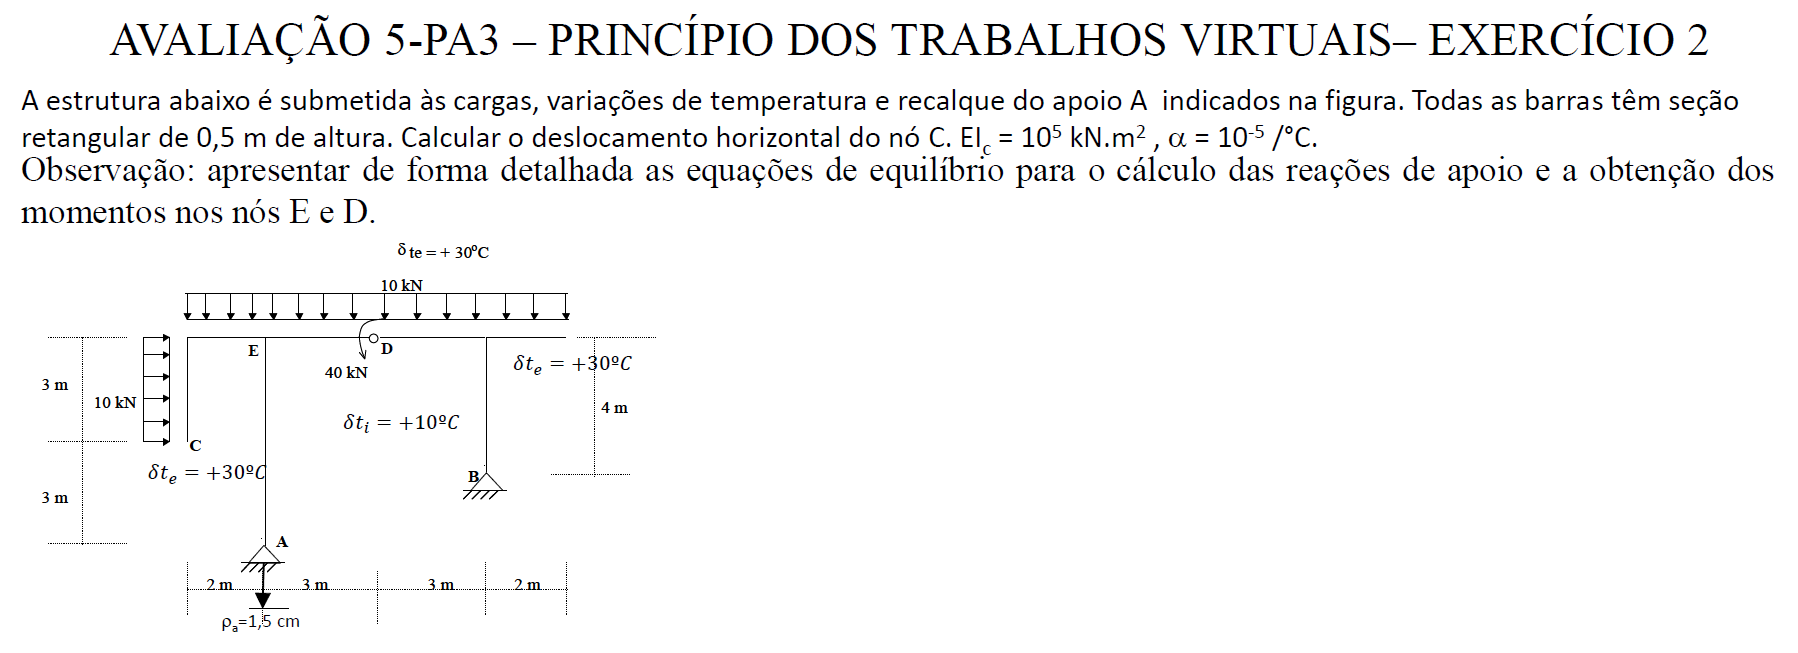

In [2]:
Image("Figuras/PA3-5.png")

# Formulário

## Princípio dos Trabalhos Virtuais

\begin{equation*}
    \delta = \sum_{i=1}^{n}{\int{\frac{\bar{M}_{i}M_{i}}{EI_{i}}}\mathrm{d}x}
\end{equation*}

## Temperatura

### Barras Com Seção Transversal Constante

\begin{equation*}
    \delta = \alpha\cdot \delta t_{g}\cdot A_{\bar{N}} + \frac{\alpha\cdot \Delta t}{h}A_{\bar{M}}
\end{equation*}

Onde,

* $A_{\bar{N}}$ é a área dos diagramas de esforço normal;

* $A_{\bar{M}}$ é a área dos diagramas de momento fletor;

* $\delta t_{g}$ é a variação média de temperatura;

* $\Delta t$ é a diferença de temperatura $\Delta t = \delta t_{i} - \delta t_{e}$ (temperatura interna menos a temperatura externa).

### Barras Com Seção Transversal Variável

\begin{equation*}
    \delta = \alpha\int_{l}{\bar{N}\delta t_{g}}\mathrm{d}s + \alpha\cdot\Delta t\int_{l}{\frac{\bar{M}}{h}}\mathrm{d}s
\end{equation*}

## Recalque

\begin{equation*}
    \delta = -\sum{\bar{R}\cdot \rho}
\end{equation*}

## Utilização

Calcular o deslocamento para os esforços no Estado de Deformação, em seguida, calcular o deslocamento em função da Temperatura e, em seguida, o deslocamento em função dos recalques. Por último, devido à linearidade, utilizar a superposição de efeitos e somar os resultados.

# Solução

In [3]:
kN,m,C = sp.symbols('kN,m,C',positive=True)
M,M_b = sp.symbols('M,M_b',cls=sp.Function)
EI,l = sp.symbols('EI,l',positive=True)
delta_i = sp.Integral(M(x)*M_b(x)/EI,(x,0,l))
display(delta_i)

l               
⌠               
⎮ M(x)⋅M_b(x)   
⎮ ─────────── dx
⎮      EI       
⌡               
0               

## Estado de Deformação

Vamos utilizar as equações de equilíbrio para obter as reações de apoio. Assim, temos:

\begin{equation*}
    \sum_{F_{x}} = 0\therefore
\end{equation*}

\begin{equation*}
    10\times 3 + H_{A} + H_{B} = 0\therefore
\end{equation*}

\begin{equation*}
    H_{A} + H_{B} = -30~kN
\end{equation*}

\begin{equation*}
    \sum_{F_{y}} = 0\therefore
\end{equation*}

\begin{equation*}
    -10\times 10 + V_{A} + V_{B} = 0\therefore
\end{equation*}

\begin{equation*}
    V_{A} + V_{B} = 100~kN
\end{equation*}

\begin{equation*}
    \sum_{M_{A}} = 0\therefore
\end{equation*}

\begin{equation*}
    - 10\times 3\times \left(3+\frac{3}{2}\right) - 10\times 8\times 4 + 10\times 2\times 1 - H_{B}\times 2 + V_{B}\times 6 + 40 = 0\therefore
\end{equation*}

\begin{equation*}
    -2H_{B} + 6V_{B} = 395~kN\cdot m 
\end{equation*}

\begin{equation*}
    \sum_{M_{D+}} = 0\therefore
\end{equation*}

\begin{equation*}
    -10\times 5\times\frac{5}{2} + H_{B}\times 4 + V_{B}\times 3 = 0\therefore
\end{equation*}

\begin{equation*}
    4H_{B} + 3V_{B} = 125~kN\cdot m
\end{equation*}


Logo,

\begin{equation*}
    \left[\begin{matrix}
        1   &   0   &   1   &   0 \\
        0   &   1   &   0   &   1 \\
        0   &   0   &   -2  &   6 \\
        0   &   0   &   4   &   3
    \end{matrix}\right]
        \left[\begin{matrix}
        H_{A}   \\  V_{A}   \\  H_{B}   \\  V_{B}
    \end{matrix}\right] =
    \left[\begin{matrix}
        -30 \\  100 \\  395 \\  125
    \end{matrix}\right]
\end{equation*}

In [4]:
K = sp.Matrix([[1,0,1,0],[0,1,0,1],[0,0,-1,6],[0,0,4,3]])
f = sp.Matrix([[-30],[100],[395],[125]])
display(K.solve(f))

⎡-125/9⎤
⎢      ⎥
⎢ 995  ⎥
⎢ ───  ⎥
⎢  27  ⎥
⎢      ⎥
⎢-145/9⎥
⎢      ⎥
⎢ 1705 ⎥
⎢ ──── ⎥
⎣  27  ⎦

Assim, as reações de apoio são:

* $H_{A} = -\frac{125}{9}kN$

* $V_{A} = \frac{995}{27}kN$

* $H_{B} = -\frac{145}{9}kN$

* $V_{B} = \frac{1705}{27}kN$